<a href="https://colab.research.google.com/github/Ibraheem101/tensorflow/blob/main/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [6]:
X_train_scaled = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)/255
X_test_scaled = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)/255

In [7]:
X_train_scaled.shape

(60000, 28, 28, 1)

In [8]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [9]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [11]:
model.fit(X_train_scaled, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1436 - accuracy: 0.9560
Epoch 2/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0478 - accuracy: 0.9853
Epoch 3/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0328 - accuracy: 0.9900
Epoch 4/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0241 - accuracy: 0.9924
Epoch 5/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0185 - accuracy: 0.9940


In [12]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0301 - accuracy: 0.9906


[0.030081192031502724, 0.9905999898910522]

In [13]:
y_prob = model.predict(X_test_scaled)

In [14]:
y_prob[0]

array([1.0458241e-10, 2.6881715e-09, 7.9967943e-09, 5.4241286e-07,
       2.5713351e-10, 2.6970812e-10, 3.2717189e-18, 9.9999905e-01,
       7.0689246e-08, 2.2915265e-07], dtype=float32)

In [15]:
y_pred = np.array([np.argmax(y_prob[i]) for i in range(len(y_prob))])

In [16]:
type(y_pred)

numpy.ndarray

In [17]:
from sklearn.metrics import confusion_matrix

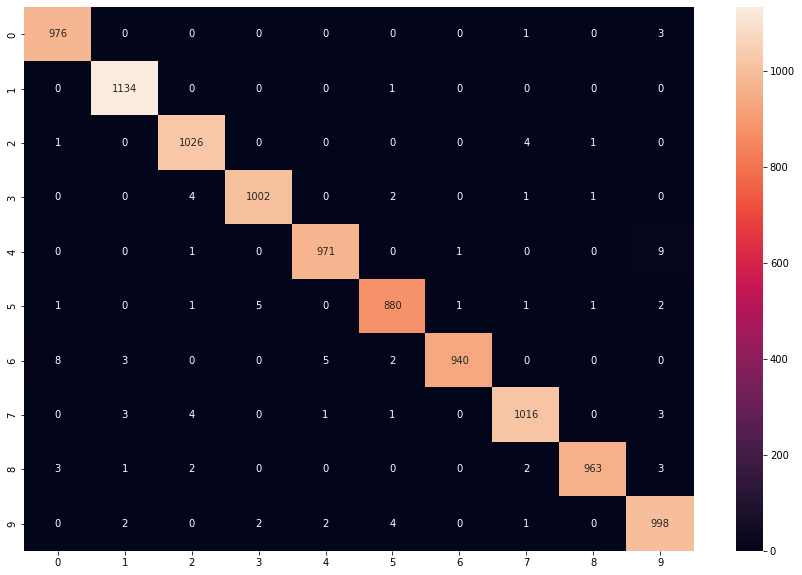

In [18]:
plt.figure(figsize = (15, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '.5g')